In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
pip install librosa

In [ ]:
%cd /content/drive/MyDrive/PSD/emosi

/content/drive/MyDrive/PSD/emosi


In [ ]:
folders=['YAF_sad','YAF_pleasant_surprised','YAF_neutral',
         'YAF_happy','YAF_fear','YAF_disgust','YAF_angry',
         'OAF_Sad','OAF_Pleasant_surprise','OAF_neutral',
         'OAF_happy','OAF_Fear','disgust',
         'angry',
         ]

In [ ]:
# Import Library
import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode

In [ ]:
def calculate_statistics(audio_path):
    y, sr = librosa.load(audio_path)

    # UNTUK MENGHITUNG NILAI STATISTIKA
    mean = np.mean(y)
    std_dev = np.std(y)
    max_value = np.max(y)
    min_value = np.min(y)
    median = np.median(y)
    skewness = skew(y)  # Calculate skewness
    kurt = kurtosis(y)  # Calculate kurtosis
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y, 75)
    mode_value, _ = mode(y)  # Calculate mode
    iqr = q3 - q1

    # UNTUK MENGHITUNG NILAI ZCR
    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))
    zcr_median = np.median(librosa.feature.zero_crossing_rate(y=y))
    zcr_std_dev = np.std(librosa.feature.zero_crossing_rate(y=y))
    zcr_kurtosis = kurtosis(librosa.feature.zero_crossing_rate(y=y)[0])
    zcr_skew = skew(librosa.feature.zero_crossing_rate(y=y)[0])

    # UNTUK MENGHITUNG NILAI RMSE
    rmse = np.sum(y**2) / len(y)
    rmse_median = np.median(y**2)
    rmse_std_dev = np.std(y**2)
    rmse_kurtosis = kurtosis(y**2)
    rmse_skew = skew(y**2)

    return [zcr_mean, zcr_median, zcr_std_dev, zcr_kurtosis, zcr_skew, rmse, rmse_median, rmse_std_dev, rmse_kurtosis, rmse_skew]


In [ ]:
features =[]

In [ ]:
for folder in folders:
    folder_path = f'{folder}'
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            audio_path = os.path.join(folder_path, filename)
            statistics = calculate_statistics(audio_path)
            features.append([folder, filename] + statistics)

In [ ]:
# Membuat DataFrame dari data
columns =  ['Label', 'File'] + ['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
df = pd.DataFrame(features, columns=columns)

In [ ]:
# Menampilkan file CSV
df

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_five_sad.wav,0.168355,0.046875,0.224203,1.110286,1.543645,0.001743,0.000229,0.003828,18.782012,3.854990
1,YAF_sad,YAF_far_sad.wav,0.147078,0.033447,0.216568,1.950711,1.810082,0.001385,0.000220,0.002891,15.806340,3.585851
2,YAF_sad,YAF_check_sad.wav,0.165661,0.063965,0.216043,2.118684,1.783156,0.001376,0.000151,0.003176,22.182385,4.162531
3,YAF_sad,YAF_join_sad.wav,0.130321,0.031738,0.211256,2.716166,2.022808,0.001373,0.000317,0.002748,19.017952,3.842174
4,YAF_sad,YAF_jail_sad.wav,0.121712,0.036865,0.196020,3.673346,2.225937,0.003492,0.000581,0.006895,14.360406,3.403569
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,angry,OAF_shall_angry.wav,0.124545,0.069336,0.123647,1.199579,1.559375,0.002327,0.000171,0.005725,22.112604,4.195548
2796,angry,OAF_mouse_angry.wav,0.100349,0.054443,0.112813,3.240120,1.992513,0.003177,0.000199,0.007173,16.497961,3.659182
2797,angry,OAF_pain_angry.wav,0.097416,0.050781,0.117787,4.870260,2.323620,0.002614,0.000146,0.006855,27.579479,4.551090
2798,angry,OAF_lot_angry.wav,0.088930,0.055908,0.103065,6.091986,2.631815,0.002318,0.000237,0.006366,39.610165,5.619980


In [ ]:
df.to_csv('emosi2.csv',index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Baca file CSV
dn = pd.read_csv("emosi2.csv")
# Tentukan kolom yang akan distandarisasi
kolom = ['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
# Inisialisasi StandardScaler
scaler = StandardScaler()
# Lakukan standarisasi pada kolom yang telah ditentukan
dn[kolom] = scaler.fit_transform(dn[kolom])
# Simpan DataFrame yang telah distandarisasi ke dalam file CSV baru
dn.to_csv("emosi2normalisasi.csv", index=False)


In [ ]:
norm=pd.read_csv('emosi2normalisasi.csv')
norm

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_five_sad.wav,0.417567,-0.632066,0.918615,-0.857907,-0.863771,-0.095773,0.148228,-0.195603,-0.638306,-0.724434
1,YAF_sad,YAF_far_sad.wav,0.022307,-1.045013,0.756379,-0.437007,-0.322893,-0.228551,0.111430,-0.320760,-0.712435,-0.863297
2,YAF_sad,YAF_check_sad.wav,0.367532,-0.106497,0.745229,-0.352883,-0.377554,-0.232075,-0.183732,-0.282783,-0.553596,-0.565757
3,YAF_sad,YAF_join_sad.wav,-0.288993,-1.097570,0.643528,-0.053653,0.108951,-0.233002,0.527433,-0.339909,-0.632428,-0.731046
4,YAF_sad,YAF_jail_sad.wav,-0.448926,-0.939899,0.319801,0.425721,0.521313,0.554133,1.656748,0.214162,-0.748456,-0.957346
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,angry,OAF_shall_angry.wav,-0.396287,0.058681,-1.217952,-0.813188,-0.831839,0.121467,-0.101155,0.057880,-0.555335,-0.548721
2796,angry,OAF_mouse_angry.wav,-0.845788,-0.399314,-1.448134,0.208753,0.047452,0.437184,0.019580,0.251264,-0.695206,-0.825462
2797,angry,OAF_pain_angry.wav,-0.900272,-0.511936,-1.342461,1.025157,0.719613,0.228061,-0.206343,0.208747,-0.419145,-0.365278
2798,angry,OAF_lot_angry.wav,-1.057913,-0.354265,-1.655259,1.637021,1.345262,0.117841,0.183813,0.143426,-0.119439,0.186219


In [ ]:
# Daftar kolom yang ingin dilewati
kolomlabel= ['Label','File',]
# Menghitung rata-rata untuk kolom numerik tertentu (mengabaikan kolom yang tidak diinginkan)
rata2= norm.drop(columns=kolomlabel).mean()
#membulatkan hasil komputasi dengan round dengan ketentuan 2 setelah koma, biar ga panjang bestiiiiiii
dibulatkan=rata2.round(2)
# Menampilkan rata-rata
print('--MEAN--')
print(dibulatkan)


--MEAN--
ZCR Mean         0.0
ZCR Median       0.0
ZCR Std Dev      0.0
ZCR Kurtosis    -0.0
ZCR Skew        -0.0
RMSE             0.0
RMSE Median      0.0
RMSE Std Dev    -0.0
RMSE Kurtosis    0.0
RMSE Skew        0.0
dtype: float64


In [ ]:
# Daftar kolom yang ingin dilewati
kolomlabel= ['Label','File']
# Menghitung rata-rata untuk kolom numerik tertentu (mengabaikan kolom yang tidak diinginkan)
standv= norm.drop(columns=kolomlabel).std()
#membulatkan hasil komputasi dengan round dengan ketentuan 2 setelah koma, biar ga panjang bestiiiiiii
bulatkan=standv.round(2)
# Menampilkan rata-rata
print('--STANDARD DEVIASI--')
print(bulatkan)


--STANDARD DEVIASI--
ZCR Mean         1.0
ZCR Median       1.0
ZCR Std Dev      1.0
ZCR Kurtosis     1.0
ZCR Skew         1.0
RMSE             1.0
RMSE Median      1.0
RMSE Std Dev     1.0
RMSE Kurtosis    1.0
RMSE Skew        1.0
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pickle import dump

In [ ]:
# Baca data dari file CSV
dataknn= pd.read_csv('emosi2.csv')
# Pisahkan fitur (X) dan label (y)
X = dataknn.drop(['Label','File'], axis=1)  # Ganti 'target_column' dengan nama kolom target
y = dataknn['Label']
# split data into train and test sets
X_train,X_test,y_train, y_test= train_test_split(X, y, random_state=1, test_size=0.2)
# define scaler
scaler = StandardScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
# transform the training dataset
X_train_scaled = scaler.transform(X_train)

In [ ]:
import pickle
with open('scaler.pkl', 'rb') as standarisasi:
    loadscal= pickle.load(standarisasi)

In [ ]:
X_test_scaled=loadscal.transform(X_test) #normalisasi X testing dari hasil normalisasi X train yang disimpan dalam model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
K = 30
acc = np.zeros((K-1))

for n in range(1,K,2):
    knn = KNeighborsClassifier(n_neighbors= n, metric = "euclidean").fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc[n-1]= accuracy_score(y_test,y_pred)

print('akurasi terbaik adalah ', acc.max(), 'dengan nilai k =', acc.argmax()+1)

akurasi terbaik adalah  0.7035714285714286 dengan nilai k = 7


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 13, metric = "euclidean")
dump(knn, open('modelknn.pkl', 'wb'))


In [ ]:
#array=np.array([0.1722103851,0.0419921875,0.2303348292,1.158274856,1.556415655,0.001505466753,0.00024307908,0.0033376536,24.95338147,4.40281652])
#arnorm=loadscal.transform(array)
#arnorm

In [ ]:
import pickle
with open('modelknn.pkl', 'rb') as knn:
    loadknn= pickle.load(knn)
loadknn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
y_pred = loadknn.predict(X_test_scaled)
y_pred

array(['OAF_Pleasant_surprise', 'YAF_disgust', 'YAF_neutral',
       'YAF_disgust', 'OAF_Sad', 'OAF_neutral', 'YAF_neutral', 'angry',
       'disgust', 'OAF_Sad', 'YAF_sad', 'YAF_sad', 'angry', 'angry',
       'disgust', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_neutral',
       'angry', 'YAF_neutral', 'YAF_pleasant_surprised', 'OAF_neutral',
       'angry', 'YAF_neutral', 'OAF_neutral', 'YAF_sad',
       'YAF_pleasant_surprised', 'YAF_fear', 'disgust', 'OAF_Fear',
       'OAF_neutral', 'OAF_happy', 'YAF_neutral', 'YAF_angry',
       'YAF_neutral', 'YAF_fear', 'OAF_Fear', 'OAF_happy', 'YAF_happy',
       'disgust', 'YAF_disgust', 'OAF_Sad', 'YAF_sad', 'YAF_happy',
       'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_fear', 'YAF_disgust',
       'OAF_neutral', 'OAF_Sad', 'OAF_happy', 'OAF_happy', 'OAF_Sad',
       'YAF_pleasant_surprised', 'YAF_sad', 'disgust', 'angry',
       'OAF_Pleasant_surprise', 'YAF_disgust', 'OAF_Sad', 'OAF_happy',
       'OAF_happy', 'OAF_Sad', 'angry', 'YAF_disgus

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Akurasi:",accuracy)

Akurasi: 0.6946428571428571


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Membaca data dari file CSV ke dalam DataFrame pandas
data = pd.read_csv('emosi2normalisasi.csv')  # Ganti 'nama_file.csv' dengan nama file CSV yang sesuai

# Mengabaikan kolom-kolom yang berisi data teks
data = data.select_dtypes(include=[float, int])  # Memilih hanya kolom-kolom numerik

# Membuat objek PCA dan melakukan fitting pada data
pca = PCA(n_components=2)
pca.fit(data)
reduksi_pca = pca.transform(data)

# Sekarang Anda dapat menggunakan pca.components_ dan pca.explained_variance_ratio_ seperti sebelumnya


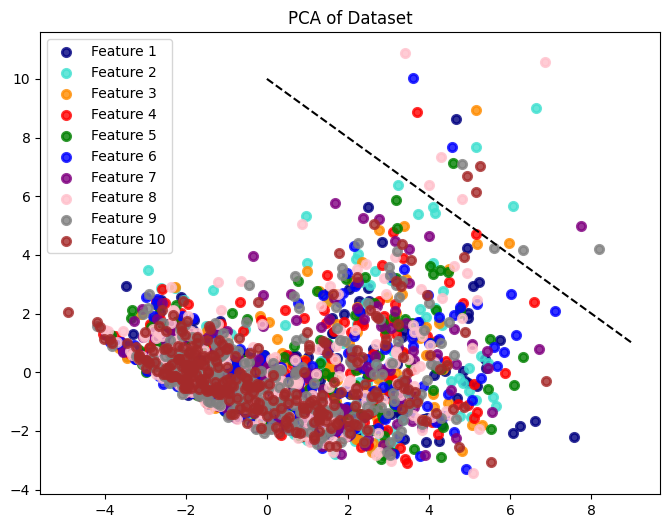

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Membaca data dari file CSV
data = pd.read_csv('emosi2normalisasi.csv')  # Ganti 'nama_file.csv' dengan nama file CSV yang sesuai
data = data.select_dtypes(include=[float, int])

# Menerapkan PCA dengan dua komponen utama
pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)

# Membuat scatter plot dengan 10 warna berbeda
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'gray', 'brown']
lw = 2

for i, color in enumerate(colors):
    plt.scatter(X_r[i::len(colors), 0], X_r[i::len(colors), 1], color=color, alpha=0.8, lw=lw, label=f'Feature {i + 1}')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Dataset')

# Tambahkan plot atau grafik yang sesuai di sini
# Misalnya, grafik garis
x_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Anda perlu mengganti x_values dan y_values dengan data yang sesuai
y_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
plt.plot(x_values, y_values, color='black', linestyle='--', label='Grafik Contoh')

plt.show()


In [ ]:
print(pca.explained_variance_ratio_)

[0.49641847 0.21440367]


In [ ]:
print(pca.singular_values_)

[117.89706183  77.48098345]


ValueError: ignored

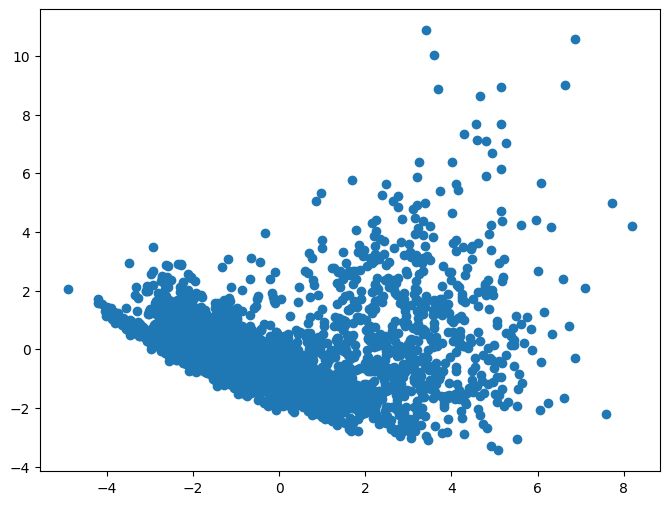

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
labels = data[['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']]

# Membuat scatter plot
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
plt.scatter(reduksi_pca[:, 0], reduksi_pca[:, 1])

# Menampilkan label untuk setiap titik data
for i, (x, y) in enumerate(zip(reduksi_pca[:, 0], reduksi_pca[:, 1])):
    plt.text(x, y, labels.iloc[i], fontsize=12, ha='right')  # Menggunakan labels.iloc[i] untuk mengakses label setiap baris

plt.title('Scatter Plot Hasil PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()